In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

In [49]:
data_df = pd.read_csv("/home/Desktop/citrus.csv")

In [22]:
data_df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [49]:
data_df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [50]:
data_df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


array([[<AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'red'}>,
        <AxesSubplot:title={'center':'green'}>],
       [<AxesSubplot:title={'center':'blue'}>, <AxesSubplot:>]],
      dtype=object)

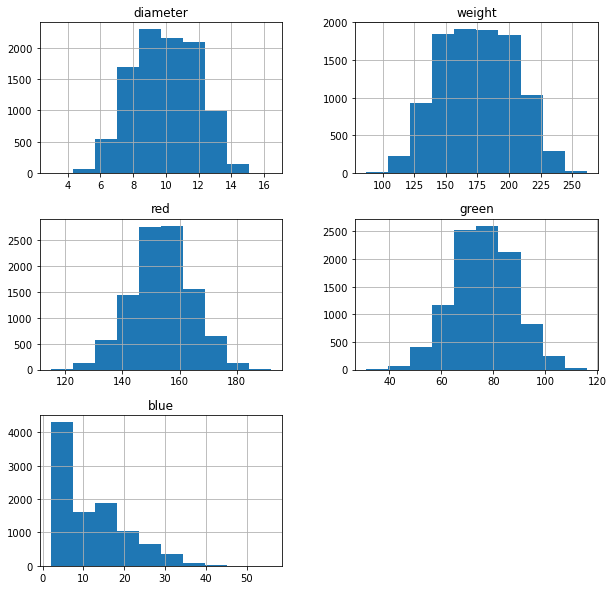

In [51]:
data_df.hist(figsize=(10,10))

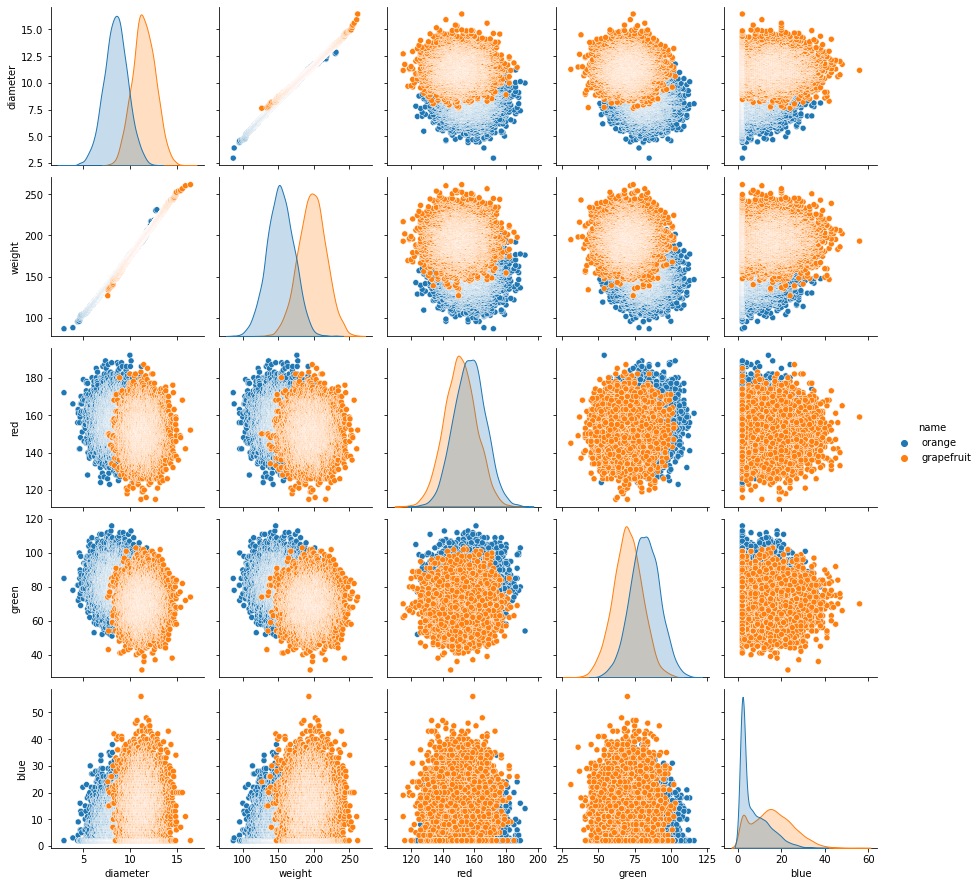

In [52]:
sns.pairplot(data_df,hue='name')

<AxesSubplot:>

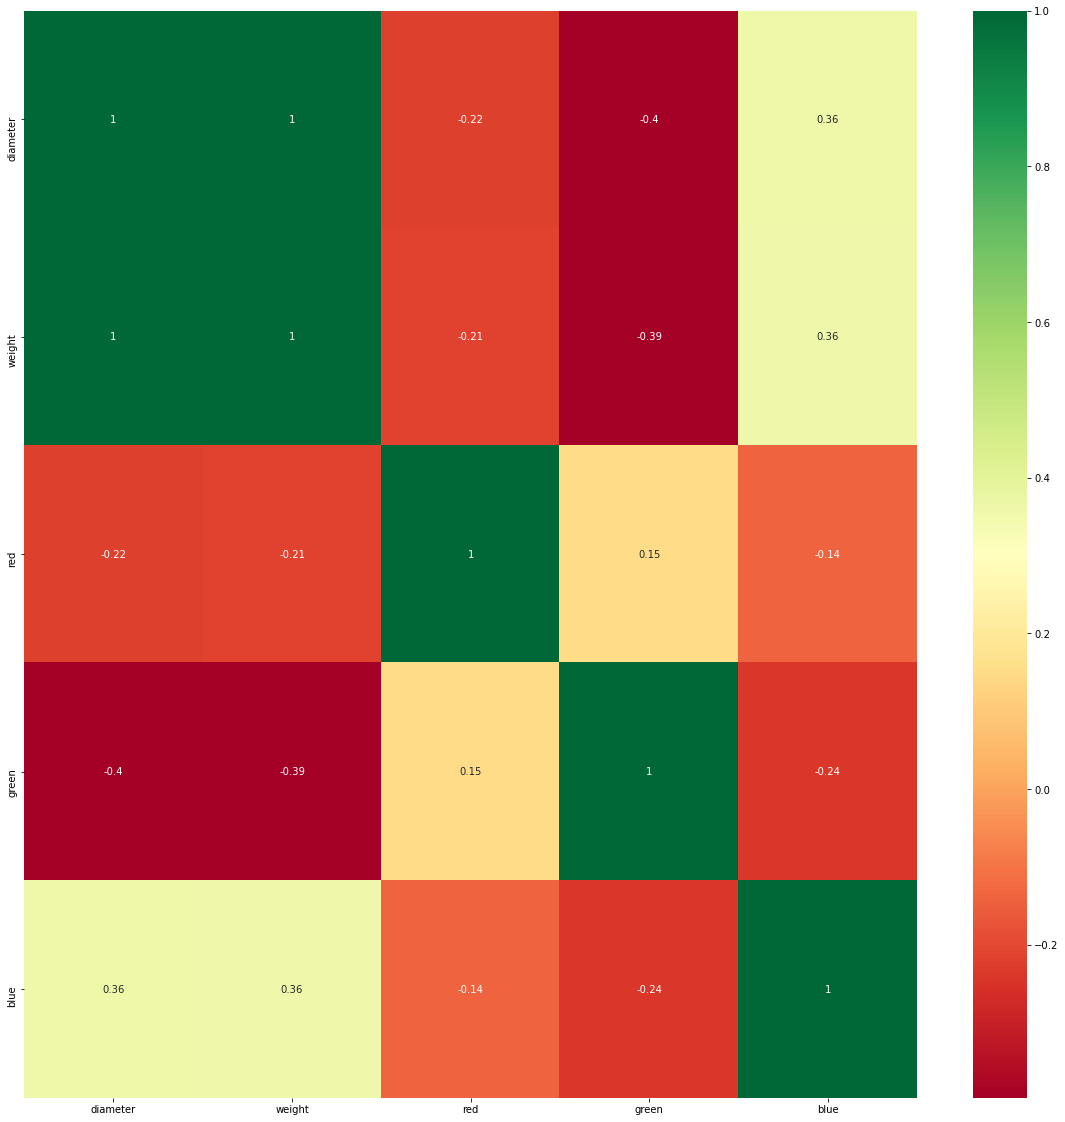

In [53]:
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
data_df.pop("weight")

0        86.76
1        88.05
2        95.17
3        95.60
4        95.76
         ...  
9995    253.89
9996    254.67
9997    256.50
9998    260.14
9999    261.51
Name: weight, Length: 10000, dtype: float64

In [51]:
model =  keras.Sequential()
model.add(layers.Dense(24, activation='relu', input_shape=(4,)))
model.add(layers.Dense(23, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',   optimizer="adam", metrics=['accuracy'])
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 24)                120       
                                                                 
 dense_21 (Dense)            (None, 23)                575       
                                                                 
 dense_22 (Dense)            (None, 1)                 24        
                                                                 
Total params: 719
Trainable params: 719
Non-trainable params: 0
_________________________________________________________________


In [52]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 0)
y = y.replace("grapefruit", 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [53]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [54]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9170


[0.20302273333072662, 0.9169999957084656]

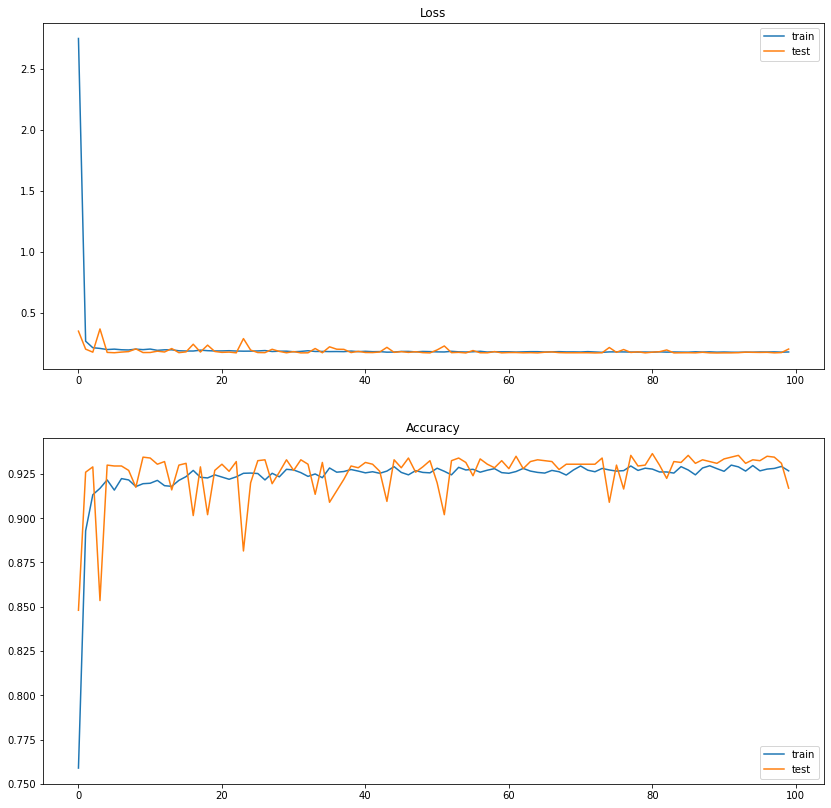

In [55]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [91]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(4,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.summary()
model.compile(loss='hinge',   optimizer='adam', metrics=['accuracy'])
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 14)                70        
                                                                 
 dense_25 (Dense)            (None, 14)                210       
                                                                 
 dense_26 (Dense)            (None, 1)                 15        
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [90]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 1)
y = y.replace("grapefruit", -1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

In [92]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

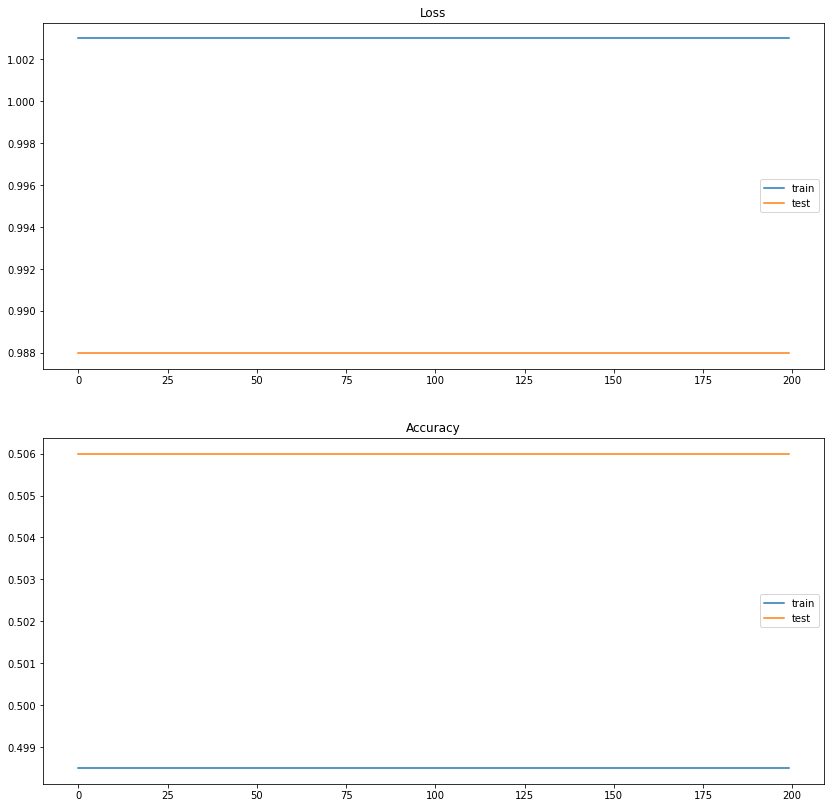

In [93]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [103]:
model =  keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(4,)))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.summary()
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='squared_hinge',   optimizer=opt, metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 14)                70        
                                                                 
 dense_28 (Dense)            (None, 14)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 15        
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


/home/djura/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [97]:
y = data_df.pop('name')
X = data_df
y = y.replace("orange", 1)
y = y.replace("grapefruit", -1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [104]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=10,                                   
                    validation_data=(X_test, y_test),
                    verbose = 0)

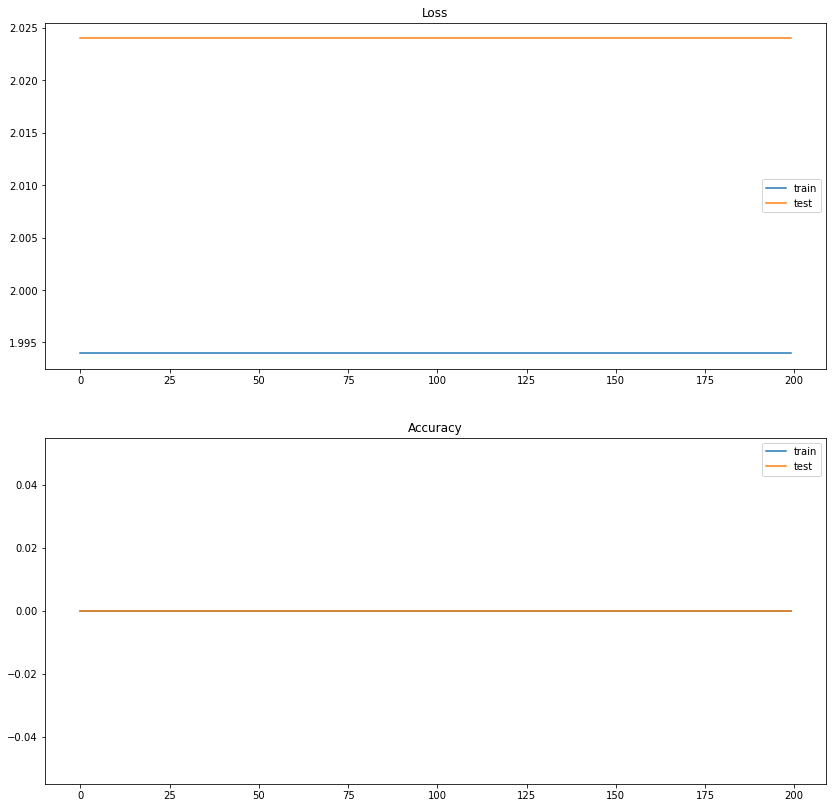

In [105]:
plt.figure(figsize = (14,14))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()